In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np


%matplotlib inline
pd.set_option('display.max_columns', None)

Import CSV

In [2]:
df = pd.read_csv('..//data/cleaned_pets.csv')

C:\Users\Max-X1\AppData\Local\Temp\ipykernel_64556\3667737777.py:1: DtypeWarning: Columns (17,18,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('..//data/cleaned_pets.csv')


In [3]:
print(df.shape)
#df.info()

(34009, 42)


Additional Cleaning

In [4]:
# Convert to datetime
df['published_at'] = pd.to_datetime(df['published_at'])
df['status_changed_at'] = pd.to_datetime(df['status_changed_at'])
df['published_date'] = pd.to_datetime(df['published_date'])
df['status_change_date'] = pd.to_datetime(df['status_change_date'])

In [5]:
#df.info()

In [6]:
# Define function to switch dtypes to string
def string_clean(column):
    x = df[column].astype('string')
    return x

# Switch objects to strings
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = string_clean(column)

In [7]:
#df.info()

In [8]:
# Create dataframes to use for analysis
available = df[df['status'] == 'adoptable']
adopted = df[(df['year_status_change'] == 2023) & (df['status'] == 'adopted')]

## Q1. What is the overall adoption rate for 2023?

In [9]:
# Count # of adoptions in adopted df and df - divide adopted by all pets and multiply * 100
overall_ar = round((adopted['id'].count() / df['id'].count()) * 100, 2)

print('Average Adoption Time:', overall_ar, '%')

Average Adoption Time: 87.44 %


## Q2. Are there specific species and breeds that are more likely to be adopted?

#### What is the adoption rate by species? 

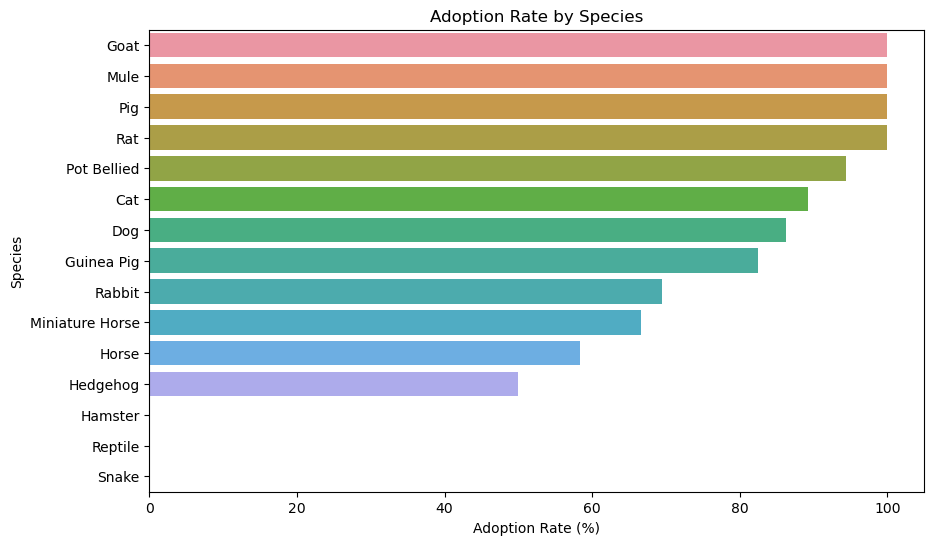

In [10]:
# Group and count for adopted and total
total_by_species = df.groupby('species')['id'].count().reset_index(name='count_total')
adopted_by_species = adopted.groupby('species')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
species_ar = pd.merge(total_by_species, adopted_by_species, on='species', how='outer')

# Add new column and calculate adoption rate + round
species_ar['adoption rate %'] = round((species_ar['count_adopted'] / species_ar['count_total']) * 100, 2)
species_ar = species_ar.sort_values('adoption rate %', ascending=False)

# Plot in barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='adoption rate %', y='species', data=species_ar)
plt.xlabel('Adoption Rate (%)')
plt.ylabel('Species')
plt.title('Adoption Rate by Species')
plt.show()

#### What is the adoption rate by age, gender, and size?

Age

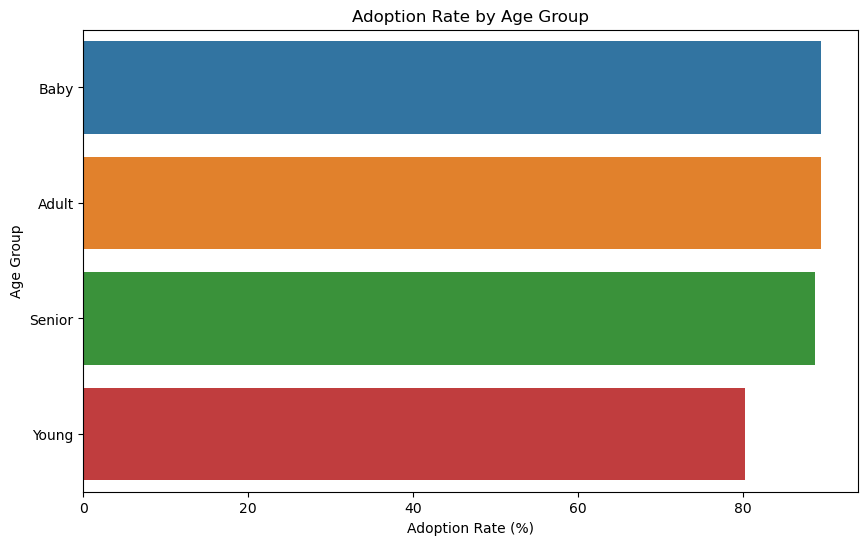

In [11]:
# Group and count for adopted and total
total_by_age = df.groupby('age')['id'].count().reset_index(name='count_total')
adopted_by_age = adopted.groupby('age')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
age_ar = pd.merge(total_by_age, adopted_by_age, on='age', how='outer')

# Add new column and calculate adoption rate + round
age_ar['adoption rate %'] = round((age_ar['count_adopted'] / age_ar['count_total']) * 100, 2)
age_ar = age_ar.sort_values('adoption rate %', ascending=False)

# Plot as barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='adoption rate %', y='age', data=age_ar)
plt.xlabel('Adoption Rate (%)')
plt.ylabel('Age Group')
plt.title('Adoption Rate by Age Group')
plt.show()

Gender

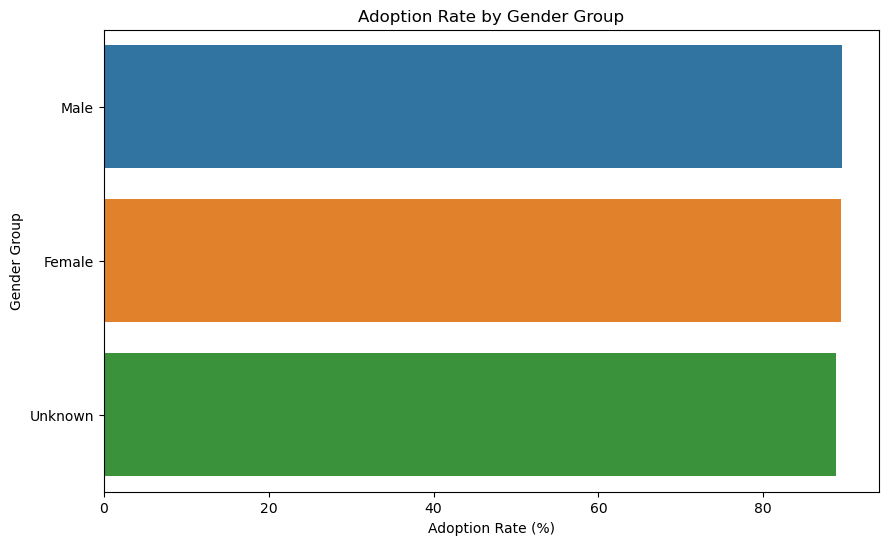

,gender,count_total,count_adopted,adoption rate %
1,Male,16647,14514.0,89.53
0,Female,17359,15221.0,89.46
2,Unknown,2,NaN,88.78


In [12]:
# Group and count for adopted and total
total_by_gender = df.groupby('gender')['id'].count().reset_index(name='count_total')
adopted_by_gender = adopted.groupby('gender')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
gender_ar = pd.merge(total_by_gender, adopted_by_gender, on='gender', how='outer')

# Add new column and calculate adoption rate + round
gender_ar['adoption rate %'] = round((age_ar['count_adopted'] / age_ar['count_total']) * 100, 2)
gender_ar = gender_ar.sort_values('adoption rate %', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='adoption rate %', y='gender', data=gender_ar)
plt.xlabel('Adoption Rate (%)')
plt.ylabel('Gender Group')
plt.title('Adoption Rate by Gender Group')
plt.show()

gender_ar

In [13]:
df[df['gender'] == 'Unknown']

,id,organization_id,url,type,species,age,gender,size,coat,tags,name,description,status,status_changed_at,published_at,breeds.primary,breeds.secondary,breeds.mixed,breeds.unknown,colors.primary,colors.secondary,colors.tertiary,attributes.spayed_neutered,attributes.house_trained,attributes.declawed,attributes.special_needs,attributes.shots_current,environment.children,environment.dogs,environment.cats,contact.address.city,contact.address.state,contact.address.postcode,published_date,status_change_date,adoption_time,month_published,day_published,year_published,month_status_change,day_status_change,year_status_change
33944,59486311.0,TN341,https://www.petfinder.com/scales-fins-others/b...,"Scales, Fins & Other",Reptile,Young,Unknown,Medium,<NA>,<NA>,Beardy,Read to the bottom to see how to adopt this be...,adoptable,2023-01-16 21:10:14+00:00,2023-01-16 21:10:13+00:00,Bearded Dragon,<NA>,False,False,Tan,<NA>,<NA>,False,False,NaN,False,False,False,False,False,Nashville,TN,37211.0,2023-01-16,2023-01-16,0.0,1.0,16.0,2023.0,1.0,16.0,2023.0
33945,59486226.0,TN341,https://www.petfinder.com/scales-fins-others/n...,"Scales, Fins & Other",Snake,Adult,Unknown,Medium,<NA>,"Friendly, Smart, Curious, Independent, Dignifi...",Nashville,Read to the bottom please to see how to adopt ...,adoptable,2023-01-16 20:54:58+00:00,2023-01-16 20:54:56+00:00,Boa,<NA>,False,False,<NA>,<NA>,<NA>,False,False,NaN,False,False,<NA>,False,False,Nashville,TN,37211.0,2023-01-16,2023-01-16,0.0,1.0,16.0,2023.0,1.0,16.0,2023.0


Size

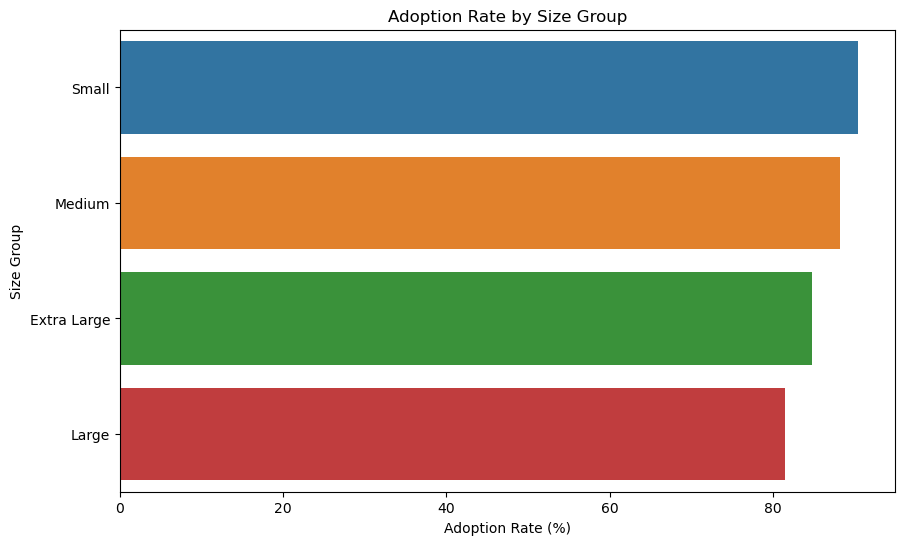

,size,count_total,count_adopted,adoption rate %
3,Small,6555,5925,90.39
2,Medium,21417,18882,88.16
0,Extra Large,301,255,84.72
1,Large,5735,4673,81.48


In [14]:
# Group and count for adopted and total
total_by_size = df.groupby('size')['id'].count().reset_index(name='count_total')
adopted_by_size = adopted.groupby('size')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
size_ar = pd.merge(total_by_size, adopted_by_size, on='size', how='outer')

# Add new column and calculate adoption rate + round
size_ar['adoption rate %'] = round((size_ar['count_adopted'] / size_ar['count_total']) * 100, 2)
size_ar = size_ar.sort_values('adoption rate %', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='adoption rate %', y='size', data=size_ar)
plt.xlabel('Adoption Rate (%)')
plt.ylabel('Size Group')
plt.title('Adoption Rate by Size Group')
plt.show()

size_ar

## Q3. Are there patterns or trends related to how quickly an animal is adopted in TN? 

## Adoption Speed Trends

#### What is the overall average adoption speed?

In [15]:
avg_at = round(adopted['adoption_time'].mean())
print('Average Adoption Time:', avg_at, 'days')

Average Adoption Time: 17 days


#### What is the average adoption speed per species listed?

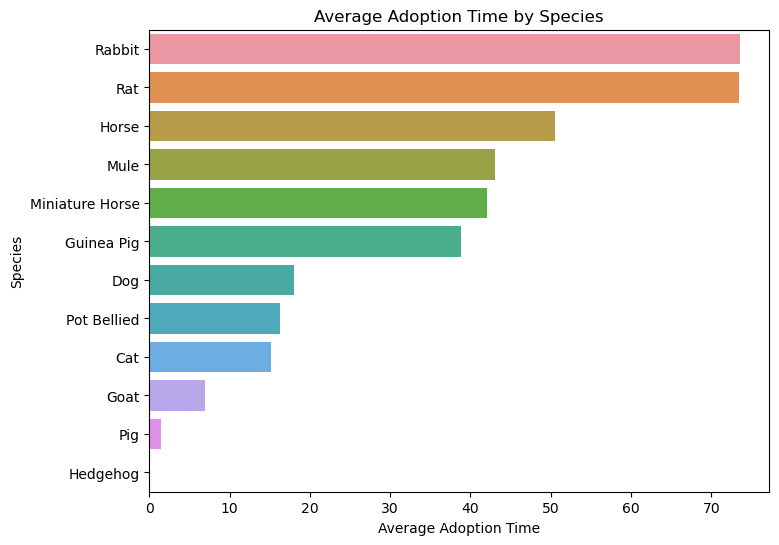

In [16]:
species_at = adopted.groupby('species')['adoption_time'].mean().reset_index(name='avg_at').sort_values('avg_at', ascending=False)

plt.figure(figsize=(8, 6))  
sns.barplot(x='avg_at', y='species', orient='h', data=species_at)
plt.xlabel('Average Adoption Time')
plt.ylabel('Species')
plt.title('Average Adoption Time by Species')
plt.show()

#### Does an animals age impact adoption speed?

Age vs Adoption Speed

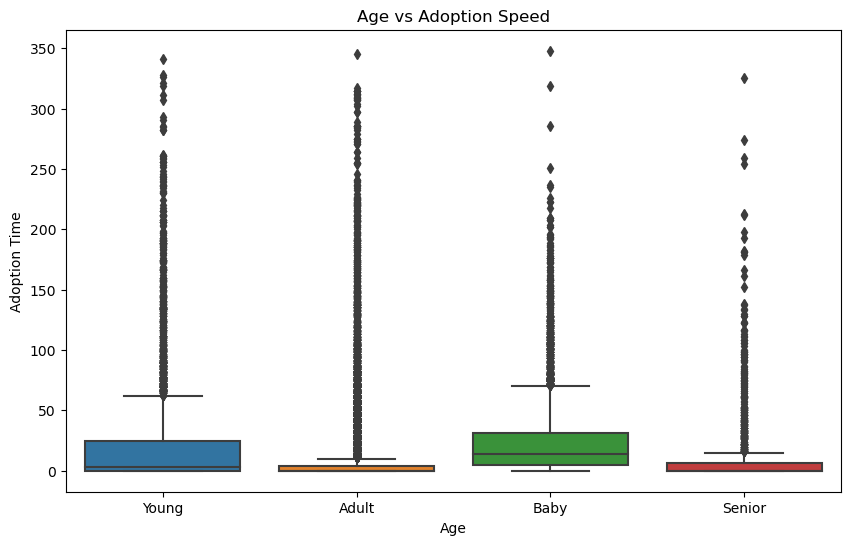

In [17]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x='age', y='adoption_time', data=adopted)
plt.xlabel('Age')
plt.ylabel('Adoption Time')
plt.title('Age vs Adoption Speed')
plt.show()

#### Does an animals gender impact adoption speed?

Gender vs Adoption Speed

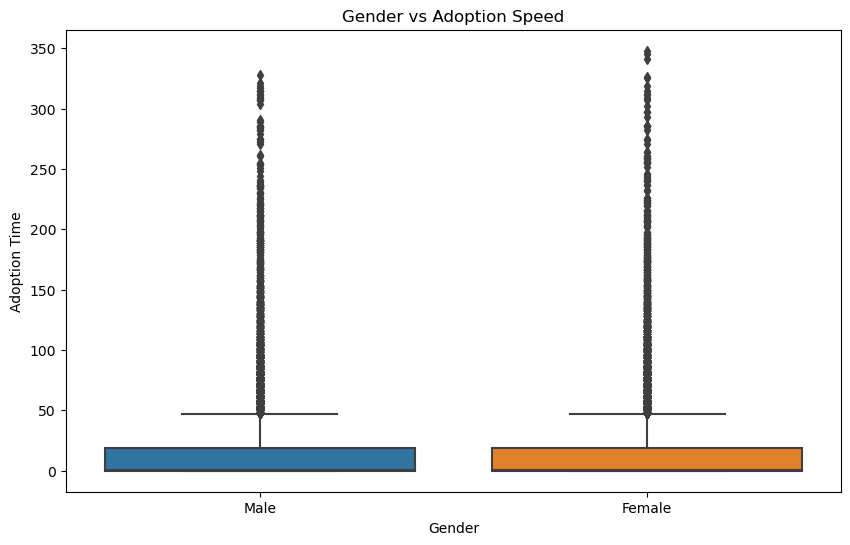

In [18]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='gender', y='adoption_time', data=adopted)
plt.xlabel('Gender')
plt.ylabel('Adoption Time')
plt.title('Gender vs Adoption Speed')
plt.show()

#### Does an animals size impact adoption speed?

Size vs Adoption Speed

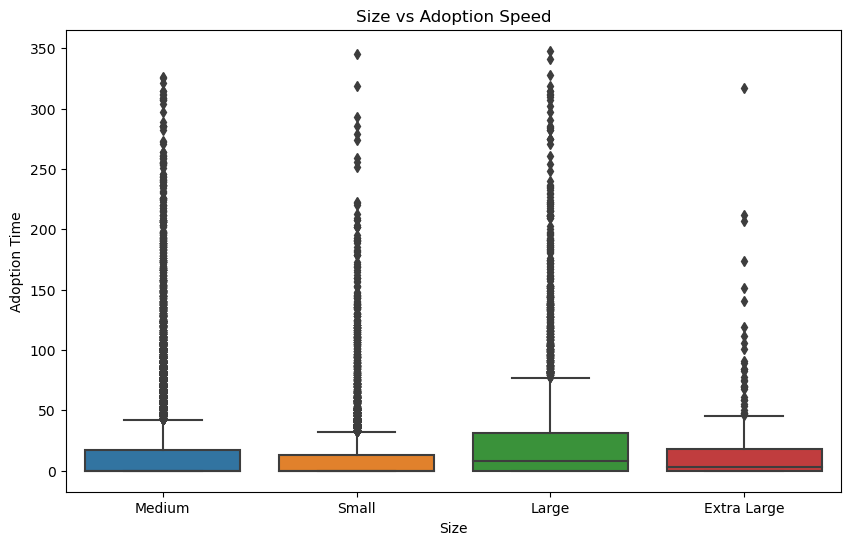

In [19]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='size', y='adoption_time', data=adopted)
plt.xlabel('Size')
plt.ylabel('Adoption Time')
plt.title('Size vs Adoption Speed')
plt.show()

### Seasonality Trends

#### Does seasonality impact adoption speed?

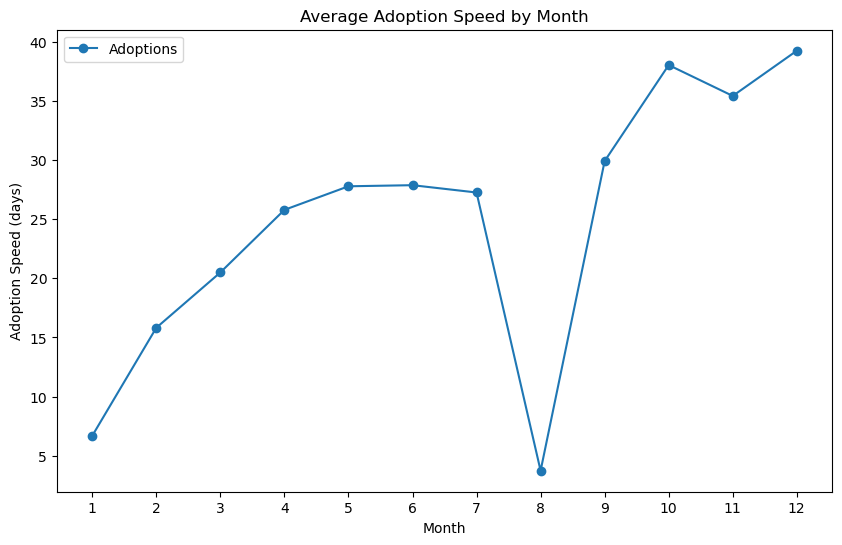

In [20]:
monthly_adoptions = adopted.groupby('month_status_change')['adoption_time'].mean()
monthly_published = df.groupby('month_published')['id'].count()

plt.figure(figsize=(10, 6))

monthly_adoptions.plot(kind='line', marker='o', label='Adoptions')
#monthly_published.plot(kind='line', marker='o')

plt.title('Average Adoption Speed by Month')
plt.xlabel('Month')
plt.ylabel('Adoption Speed (days)')
plt.xticks(range(1, 13)) 
plt.legend()

plt.show()

## Q4. What impract does seasonality have on adoptions?

#### Does seasonality impact the number of pets placed for adoption?

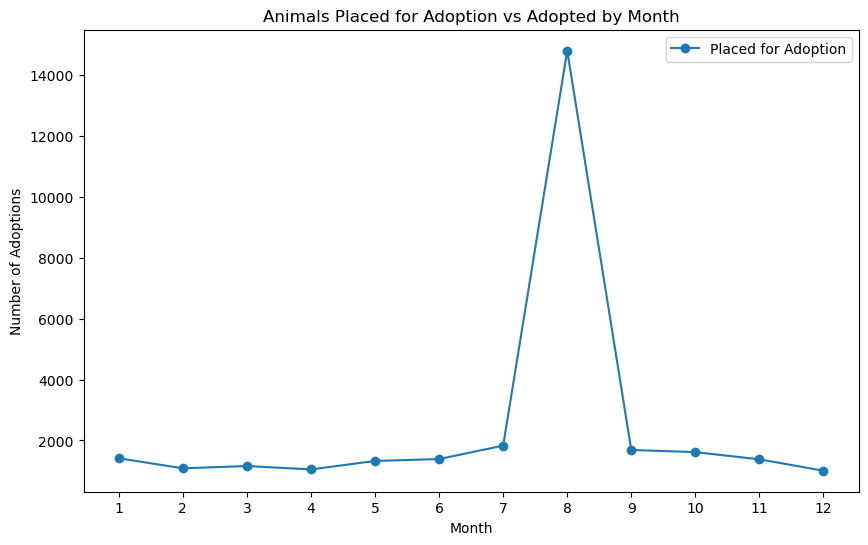

In [21]:
monthly_adoptions = adopted.groupby('month_status_change')['id'].count()
monthly_published = adopted.groupby('month_published')['id'].count()

plt.figure(figsize=(10, 6))

#monthly_adoptions.plot(kind='line', marker='o', label='Adoptions')
monthly_published.plot(kind='line', marker='o', label='Placed for Adoption')

plt.title('Animals Placed for Adoption vs Adopted by Month')
plt.xlabel('Month')
plt.ylabel('Number of Adoptions')
plt.xticks(range(1, 13)) 
plt.legend()

plt.show()

## Q4. How do adoption rates vary across different regions within TN?

How many cities in TN were animals available for adoptions?

In [22]:
df['contact.address.city'].nunique()

156

What is the adoption rate % per city?

In [41]:
# Group and count for adopted and total
total_by_city = df.groupby('contact.address.city')['id'].count().reset_index(name='count_total')
adopted_by_city = adopted.groupby('contact.address.city')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
city_ar = pd.merge(total_by_city, adopted_by_city, on='contact.address.city', how='outer')

# Add new column and calculate adoption rate + round
city_ar['adoption rate %'] = round((city_ar['count_adopted'] / city_ar['count_total']) * 100, 2)
city_ar = city_ar.sort_values('count_total', ascending=False)

print(city_ar.head(10)) # Top 10 cities
print(city_ar.tail(10)) # Bottom 10

    contact.address.city  count_total  count_adopted  adoption rate %
60           Greeneville        10371        10285.0            99.17
132          Shelbyville         2098         2061.0            98.24
105            Nashville         2027         1715.0            84.61
34            Crossville         2021         1841.0            91.09
130          Sevierville          874          854.0            97.71
21           Chattanooga          860          650.0            75.58
77             Knoxville          851          604.0            70.98
10           Blountville          783          750.0            95.79
101         Mount Juliet          695          507.0            72.95
51              Franklin          685          516.0            75.33
    contact.address.city  count_total  count_adopted  adoption rate %
145       Tellico Plains            1            NaN              NaN
144              Telford            1            1.0            100.0
42                  

What is the adoption rate per county?

In [24]:
# Import US Zips from https://simplemaps.com/data/us-zips
zipcodes = pd.read_csv('..//data/uszips.csv')
print(zipcodes.shape)
#zipcodes.head()

(33788, 18)


In [25]:
# Subset on state_name to get only TN data
zips = zipcodes[zipcodes['state_name'] == 'Tennessee']

# Count zips
zips['state_id'].count()

636

In [26]:
# Merge dataframes together on postcode
loc_df = pd.merge(df, zips, left_on='contact.address.postcode', right_on='zip', how='left')

In [27]:
#loc_df.head(1)

In [28]:
#loc_df.columns

In [29]:
# Drop unnecessary columns
drop = ['organization_id', 'url', 'tags', 'name', 
        'description', 'attributes.spayed_neutered',
       'attributes.house_trained', 'attributes.declawed',
       'attributes.special_needs', 'attributes.shots_current',
       'environment.children', 'environment.dogs', 'environment.cats', 
        'contact.address.state', 'zip', 'city', 'state_id', 'state_name', 
        'zcta', 'parent_zcta', 'county_fips',  
        'county_weights', 'county_fips_all', 'imprecise', 'military',
       'timezone']
loc_df.drop(drop, axis=1, inplace=True)

In [47]:
#loc_df.columns

In [51]:
total_by_county = loc_df.groupby('county_name')['id'].count().reset_index(name='count_total').sort_values('count_total', ascending=False)

adopted_loc = loc_df[loc_df['status'] == 'adopted']
adopted_by_county = adopted_loc.groupby('county_name')['id'].count().reset_index(name='count_adopted').sort_values('count_adopted', ascending=False)

# Merge two dataframes together
county_ar = pd.merge(total_by_county, adopted_by_county, on='county_name', how='outer')

# Add new column and calculate adoption rate + round
county_ar['adoption rate %'] = round((county_ar['count_adopted'] / county_ar['count_total']) * 100, 2)
county_ar = county_ar.sort_values('count_adopted', ascending=False)

print(county_ar.head(10)) # Top 10
print(county_ar.tail(10)) # Bottom 10 - Note - bottom 10 had no adoptions despite the number of animals

  county_name  count_total  count_adopted  adoption rate %
0      Greene        10395        10336.0            99.43
1    Davidson         2962         2693.0            90.92
2     Bedford         2090         2062.0            98.66
3      Shelby         1309         1087.0            83.04
6      Sevier          877          872.0            99.43
4   Jefferson          902          855.0            94.79
5    Sullivan          900          847.0            94.11
8  Williamson          826          713.0            86.32
7      Wilson          857          702.0            81.91
9        Knox          781          662.0            84.76
   county_name  count_total  count_adopted  adoption rate %
49      Carter           49            NaN              NaN
54        Rhea           33            NaN              NaN
58    Campbell           29            NaN              NaN
59     Lincoln           26            NaN              NaN
62       Lewis           20            NaN         

## Q5. What are the key factors influencing the adoption dynamics?

In [ ]:
# Group and count for adopted and total
total_by_age = df.groupby('age')['id'].count().reset_index(name='count_total')
adopted_by_age = adopted.groupby('age')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
age_ar = pd.merge(total_by_age, adopted_by_age, on='age', how='outer')

# Add new column and calculate adoption rate + round
age_ar['adoption rate %'] = round((age_ar['count_adopted'] / age_ar['count_total']) * 100, 2)
age_ar = age_ar.sort_values('adoption rate %', ascending=False)